In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [3]:
!pip install plotly

In [4]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
import numpy as np
import random
import os
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [6]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [7]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [8]:
train_data = train_df('D:\Mahir\Datasets\Merged Dataset 2\Training')

In [9]:
train_data


,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
1,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
2,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
3,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
4,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
...,...,...
16983,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16984,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16985,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16986,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary


In [10]:
test_data = test_df('D:\Mahir\Datasets\Merged Dataset 2\Testing')

In [11]:
test_data

,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
1,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
2,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
3,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
4,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
...,...,...
4322,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4323,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4324,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4325,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary


In [12]:
train_path = 'D:\Mahir\Datasets\Merged Dataset 2\Training'
test_path = 'D:\Mahir\Datasets\Merged Dataset 2\Testing'

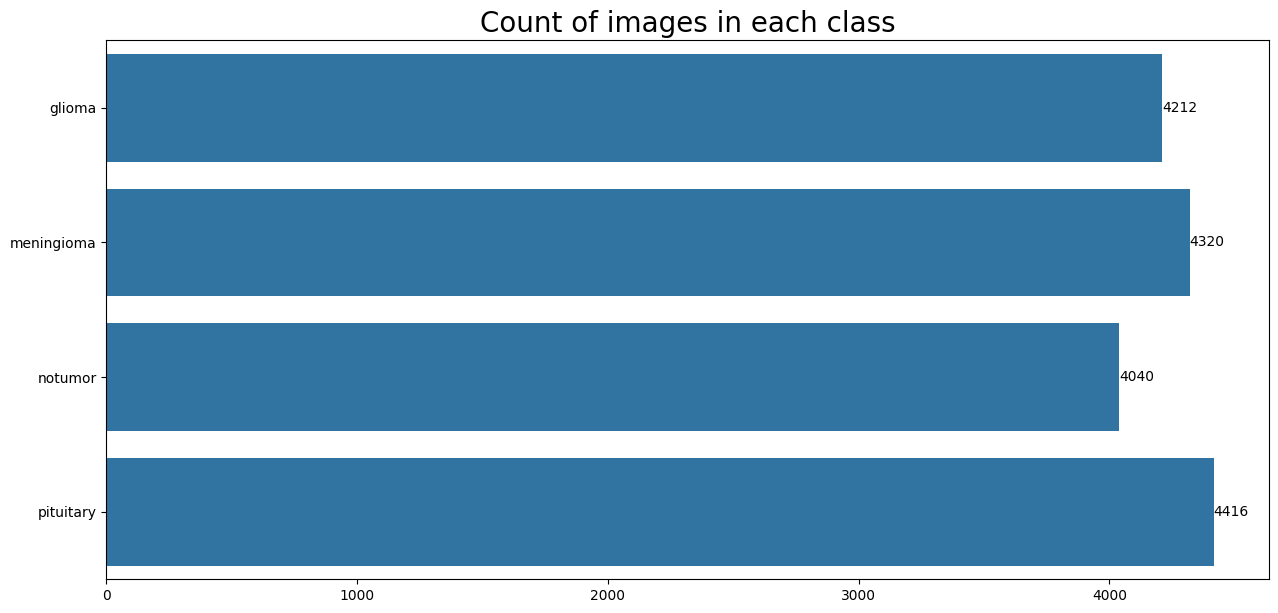

In [13]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_data , y=train_data ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

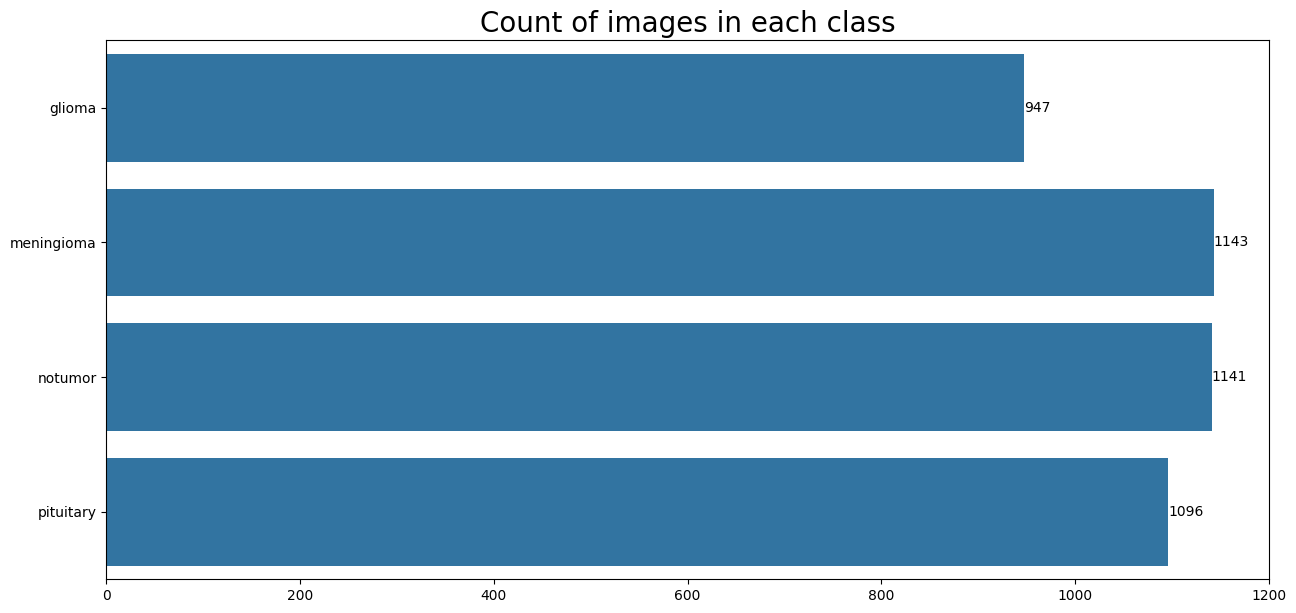

In [14]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=test_data , y=test_data ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()


In [15]:
# Image size
image_size = (160, 160)

# Training batch size
batch_size = 32

In [16]:
!pip install opencv-python

In [17]:
# Data preprocessing without any augmentation, only rescaling and validation split
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5)

# Creating training data generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(160, 160),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    seed=42)

# Creating validation data generator
val_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(160, 160),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='validation',
                                                 shuffle=False,
                                                  seed=42)

# Applying the generator to testing data, only rescaling
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(160, 160),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='training',  # Uses the other 50% intended for testing
                                                  shuffle=False,
                                                  seed=42
                                                 )

Found 16988 images belonging to 4 classes.
Found 2162 images belonging to 4 classes.
Found 2165 images belonging to 4 classes.


In [18]:
# Visualization function
def show_ImageDataGenerator(data_generator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to visualize how the ImageDataGenerator augments the data
    """
    # Generate augmented samples
    images, _ = next(data_generator)
    
    # Plot the images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)
    for i in range(num_samples):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    
    if save:
        plt.savefig('show_ImageDataGenerator.pdf')
    
    plt.show()


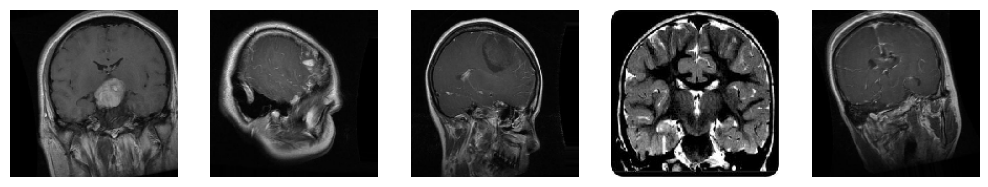

In [19]:
show_ImageDataGenerator(train_generator, num_samples=5, figsize=(12.5, 8), save=False)


In [20]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)


print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(val_generator)}')
print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (160, 160, 3)
Batch size: 32
Number of Train batches: 531
Number of Validation batches: 68
Number of Testing batches: 68


In [21]:
Classes_Map = train_generator.class_indices

num_classes = len(Classes_Map)

print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [22]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [23]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

## Custom CNN

In [24]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
# Building a Lighter Version of the Lightweight Model
def build_lighter_model():
    model = Sequential()

    # Block 1 - Lighter
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(160, 160, 3),kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))  # Less dropout to keep model small

    # Block 2 - Lighter
    model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    # Block 3 - Lighter
    model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Flattening and Dense Layers
    model.add(Flatten())
    model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))

    return model

# Initialize the model
lighter_model = build_lighter_model()
lighter_model.summary()
lighter_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 79, 79, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 79, 79, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# give a message if its early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [26]:
# give a message if its early stop\
hist = lighter_model.fit(train_generator,
                 epochs=50,
                 validation_data=val_generator,
                 callbacks=[early_stopping],
                 shuffle= False)

Epoch 1/50
531/531 [==============================] - 57s 101ms/step - loss: 1.2502 - accuracy: 0.5278 - val_loss: 3.8637 - val_accuracy: 0.2969
Epoch 2/50
531/531 [==============================] - 53s 101ms/step - loss: 1.0691 - accuracy: 0.6108 - val_loss: 3.9722 - val_accuracy: 0.3256
Epoch 3/50
531/531 [==============================] - 52s 97ms/step - loss: 1.0040 - accuracy: 0.6502 - val_loss: 2.1370 - val_accuracy: 0.4713
Epoch 4/50
531/531 [==============================] - 54s 102ms/step - loss: 0.9412 - accuracy: 0.6781 - val_loss: 1.0859 - val_accuracy: 0.6707
Epoch 5/50
531/531 [==============================] - 55s 103ms/step - loss: 0.8870 - accuracy: 0.7218 - val_loss: 2.7855 - val_accuracy: 0.5130
Epoch 6/50
531/531 [==============================] - 52s 97ms/step - loss: 0.8482 - accuracy: 0.7443 - val_loss: 0.8542 - val_accuracy: 0.7706
Epoch 7/50
531/531 [==============================] - 52s 98ms/step - loss: 0.8246 - accuracy: 0.7609 - val_loss: 0.9274 - val_accur

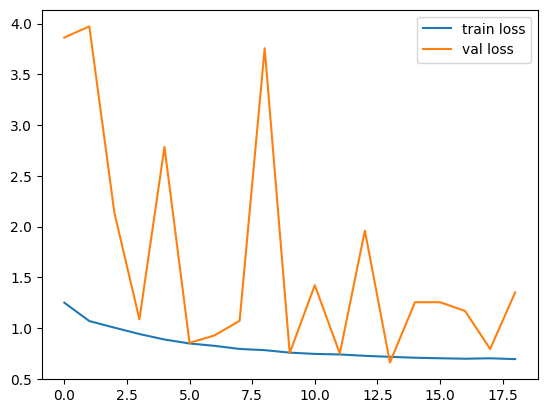

In [27]:
# plot train and val_loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

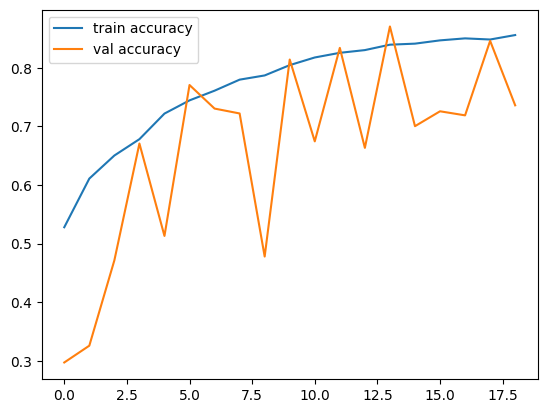

In [28]:
# plot the train and val accuracy
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [29]:
train_score = lighter_model.evaluate(train_generator, verbose=1)
valid_score = lighter_model.evaluate(val_generator, verbose=1)
test_score = lighter_model.evaluate(test_generator, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

68/68 [==============================] - 6s 87ms/step - loss: 0.8484 - accuracy: 0.8208
Train Loss: 0.5704
Train Accuracy: 88.96%
--------------------
Validation Loss: 0.6607
Validation Accuracy: 87.05%
--------------------
Test Loss: 0.8484
Test Accuracy: 82.08%
